In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv("casestudy.csv")

In [16]:
df.tail()

,Unnamed: 0,customer_email,net_revenue,year
685922,685922,qzqttwiftu@gmail.com,184.58,2017
685923,685923,pjodiifjop@gmail.com,133.03,2017
685924,685924,appaplmgko@gmail.com,200.98,2017
685925,685925,wvkpmwsgck@gmail.com,235.35,2017
685926,685926,aregboumbw@gmail.com,208.43,2017


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685927 entries, 0 to 685926
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      685927 non-null  int64  
 1   customer_email  685927 non-null  object 
 2   net_revenue     685927 non-null  float64
 3   year            685927 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 20.9+ MB


## Total revenue for the current year

In [134]:
df_year = df.groupby('year')['net_revenue'].sum().reset_index()
df_year

,year,net_revenue
0,2015,29036749.19
1,2016,25730943.59
2,2017,31417495.03


## New customer revenue

In [15]:
print("New customer revenue for 2015: ",df[df['year'] == 2015]['net_revenue'].sum())

New customer revenue for 2015:  29036749.189999994


,Unnamed: 0,customer_email,net_revenue,year
0,0,nhknapwsbx@gmail.com,249.92,2015
1,1,joiuzbvcpn@gmail.com,87.61,2015
2,2,ukkjctepxt@gmail.com,168.38,2015
3,3,gykatilzrt@gmail.com,62.40,2015
4,4,mmsgsrtxah@gmail.com,43.08,2015
...,...,...,...,...
231289,231289,xtrpmgjbwp@gmail.com,216.89,2015
231290,231290,peeorxpsbr@gmail.com,39.16,2015
231291,231291,vanasezjpw@gmail.com,233.46,2015
231292,231292,dnpremlztb@gmail.com,136.27,2015


In [169]:
def new(year):
    dic_year = {}
    df_1 = df[ df['year'] == year ]
    email = df_1['customer_email'].tolist()  
    revenue = df_1['net_revenue'].tolist()  
    for i in range(len(email)):
        dic_year[email[i]] = revenue[i]
    return dic_year

In [195]:
dic_15, dic_16, dic_17 ={},{},{}
dic_15= new(2015)
dic_16= new(2016)
dic_17= new(2017)

new_2016 = dic_16.keys() - dic_15.keys()   #15n 16y 

new_2017 = dic_17.keys() - dic_16.keys()  #16n 17y

result_2016 = 0
result_2017 = 0
for l in new_2016:
    result_2016 += dic_16[l]  
for m in new_2017:
    result_2017 += dic_17[m]
print('new customer revenue 2016:',result_2016)
print('new customer revenue 2017:',result_2017)




new customer revenue 2016: 18245491.01000029
new customer revenue 2017: 28776235.03999955


## Existing Customer Growth. 
To calculate this, use the Revenue of existing customers for current year –(minus) Revenue of existing customers from the previous year

In [143]:
totalrevenue_2015 = df_year['net_revenue'][0]
totalrevenue_2016 = df_year['net_revenue'][1]
totalrevenue_2017 = df_year['net_revenue'][2]

In [144]:
oldcustomer_revenue_2016 = totalrevenue_2016 - result_2016
oldcustomer_revenue_2017 = totalrevenue_2017 - result_2017

In [231]:

exist_2016 = dic_16.keys() - new_2016
exist_1516 = exist_2016 & dic_15.keys()
revenue_exist2015 =0
for p in exist_1516:
    revenue_exist2015 += dic_15[p]
print("Existing Customer Growth for 2016:",(oldcustomer_revenue_2016 - revenue_exist2015)/revenue_exist2015) 

exist_2017 = dic_17.keys() - new_2017
exist_1617 = exist_2017 & dic_16.keys()
revenue_exist2016 =0
for pp in exist_1617:
    revenue_exist2016 += dic_16[pp]
print("Existing Customer Growth for 2017:",(oldcustomer_revenue_2017 - revenue_exist2016)/revenue_exist2016) 

Existing Customer Growth for 2016: 0.0027240644282826233
Existing Customer Growth for 2017: 0.007864976482214802


## Revenue Lost From Attrition

In [210]:
lost_2016 = dic_15.keys() - exist_1516
revenue_lost_2016 = 0
for ii in lost_2016:
    revenue_lost_2016 += dic_15[ii]
print('Revenue Lost From Attrition for 2016',revenue_lost_2016)

lost_2017 = dic_16.keys() - exist_1617
revenue_lost_2017 = 0
for kk in lost_2017:
    revenue_lost_2017 += dic_16[kk]
print('Revenue Lost From Attrition for 2017',revenue_lost_2017)

Revenue lost from attrirtion for 2016 21571632.069999423
Revenue lost from attrirtion for 2017 23110294.94000032


## Existing Customer Revenue Current Year

In [215]:
revenue_exist_2016 = 0
for y in exist_1516:
    revenue_exist_2016 += dic_16[y]
print("Existing Customer Revenue Current Year for 2016:",revenue_exist_2016)

revenue_exist_2017 = 0
for y in exist_1617:
    revenue_exist_2017 += dic_17[y]
print("Existing Customer Revenue Current Year for 2017:",revenue_exist_2017)

Existing Customer Revenue Current Year for 2016: 7485452.580000029
Existing Customer Revenue Current Year for 2017: 2641259.9899999984


## Existing Customer Revenue Prior Year

In [219]:
print('Existing Customer Revenue Prior Year(exsit in 2016, so revenue for 2015):',revenue_exist2015)
print('Existing Customer Revenue Prior Year(exsit in 2017, so revenue for 2016):',revenue_exist2016)

Existing Customer Revenue Prior Year(exsit in 2016, so revenue for 2015): 7465117.120000036
Existing Customer Revenue Prior Year(exsit in 2017, so revenue for 2016): 2620648.6500000027


## Total Customers Current Year

In [220]:
print('Total Customers Current Year for 2015:',len(df[df['year'] == 2015]))
print('Total Customers Current Year for 2016:',len(df[df['year'] == 2016]))
print('Total Customers Current Year for 2017:',len(df[df['year'] == 2017]))


Total Customers Current Year for 2015: 231294
Total Customers Current Year for 2016: 204646
Total Customers Current Year for 2017: 249987


## New Customers

In [229]:
print('New Customers for 2016:')
new_2016
print('New Customers for 2017:')
new_2017



{'dlxhabaalb@gmail.com',
 ' jfpjltcyhu@gmail.com',
 ' jvvozhgvrf@gmail.com',
 'mcbewocivm@gmail.com',
 'lamxwqmyqo@gmail.com',
 ' xvhlilmhoe@gmail.com',
 'wyjfnnzxfb@gmail.com',
 'okqbvhpkvw@gmail.com',
 'imwjzyjqvz@gmail.com',
 'kfbctkrrvb@gmail.com',
 'mvswhilmyv@gmail.com',
 'wbgzjlupek@gmail.com',
 ' nxhjaynxau@gmail.com',
 'djojulglly@gmail.com',
 'cynicpirdh@gmail.com',
 ' lbrfaqykom@gmail.com',
 ' atduvzujel@gmail.com',
 'qrhfaeyxhw@gmail.com ',
 ' bcmodjcohw@gmail.com',
 'ifoqehmrpt@gmail.com',
 'vchnrshnvv@gmail.com',
 'kcbsatxmyw@gmail.com',
 'nwtrzxabkl@gmail.com',
 ' gufjcmjilu@gmail.com',
 'sjxcbxephs@gmail.com',
 ' nmfvflpsjs@gmail.com',
 ' nbwcvgypqg@gmail.com',
 'lvqzqgutyb@gmail.com',
 ' cgbidaxaxz@gmail.com',
 ' owlugkccfp@gmail.com',
 'mnspqlaauj@gmail.com',
 'mkmutlduur@gmail.com',
 'xccxjmjfnr@gmail.com',
 'rslmezjprz@gmail.com',
 'cdwuloxtcs@gmail.com',
 ' rbundrwxbb@gmail.com',
 ' wjdsztfhns@gmail.com',
 ' sjkxzfsgtt@gmail.com',
 ' pziiwfdqyz@gmail.com',
 'ublcbz

## Lost Customers

In [230]:
print('Lost Customers for 2016:')
lost_2016
print('Lost Customers for 2017:')
lost_2017

Lost Customers for 2016:
Lost Customers for 2017:


{'dlxhabaalb@gmail.com',
 'clrjyqcmjl@gmail.com',
 ' frwmijixhs@gmail.com',
 ' jfpjltcyhu@gmail.com',
 'zuzjbpdvzj@gmail.com',
 ' npjoyqwiir@gmail.com',
 'ujppvgzdsa@gmail.com',
 ' jvvozhgvrf@gmail.com',
 ' gwxfjvojzh@gmail.com',
 'mcbewocivm@gmail.com',
 'fgeslftagu@gmail.com',
 'lamxwqmyqo@gmail.com',
 ' xvhlilmhoe@gmail.com',
 'wyjfnnzxfb@gmail.com',
 'okqbvhpkvw@gmail.com',
 'imwjzyjqvz@gmail.com',
 ' xnomltgnbc@gmail.com',
 'kfbctkrrvb@gmail.com',
 'cbgsnyohxn@gmail.com',
 ' tttdagxnuf@gmail.com',
 'mvswhilmyv@gmail.com',
 'wbgzjlupek@gmail.com',
 ' nxhjaynxau@gmail.com',
 ' qfyhexkhbe@gmail.com',
 ' sforkbrzwj@gmail.com',
 'gntrwnxhyn@gmail.com',
 'djojulglly@gmail.com',
 'cynicpirdh@gmail.com',
 ' lbrfaqykom@gmail.com',
 ' atduvzujel@gmail.com',
 'qrhfaeyxhw@gmail.com ',
 ' bcmodjcohw@gmail.com',
 'ifoqehmrpt@gmail.com',
 'vchnrshnvv@gmail.com',
 'ihumhuzudg@gmail.com',
 'nwtrzxabkl@gmail.com',
 'vfflhzfdom@gmail.com',
 ' gufjcmjilu@gmail.com',
 'sjxcbxephs@gmail.com',
 ' xwqdxi

## Plot

There are no significant different between each years' revenue. Although the total is different form each year, the composition is no different from each year. 

If I have more time, I will analyze the percentage of the new and existing customer. Try to find out the one have the higher profit margin.

In [36]:
df_only = df.drop(columns=['Unnamed: 0','customer_email'])
df_only_2015 =df_only[df_only['year'] == 2015]
df_only_2015=df_only_2015.drop(columns=['year'])

df_only_2016 =df_only[df_only['year'] == 2016]
df_only_2016=df_only_2016.drop(columns=['year'])

df_only_2017 =df_only[df_only['year'] == 2017]
df_only_2017=df_only_2017.drop(columns=['year'])



<AxesSubplot:>

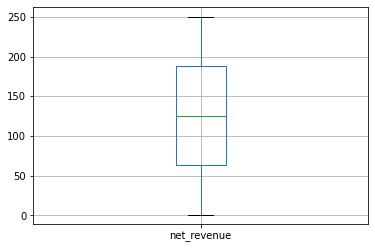

In [40]:
df_only_2015.boxplot()

<AxesSubplot:>

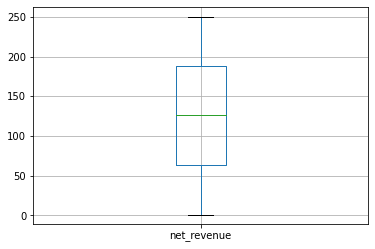

In [39]:
df_only_2016.boxplot()

<AxesSubplot:>

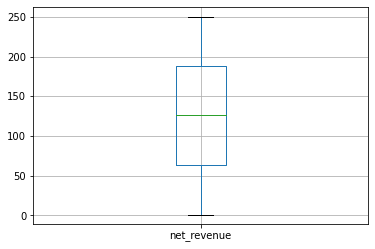

In [41]:
df_only_2017.boxplot()